In [114]:
import numpy as np
import matplotlib.pyplot as plt

from edibles.utils.local_continuum_spline import *
from edibles.utils.voigt_profile_db import *

# HD 149757

C:\Users\user\Desktop\MITACS 2024 Docs\STUDY and WORK\DR4_all
***Common Objects***
['HD 149757']
**Filtered File List**
8849    /HD149757/BLUE_437/HD149757_w437_n26_20180722_...
8862    /HD149757/BLUE_437/HD149757_w437_blue_20180722...
8877    /HD149757/BLUE_437/HD149757_w437_blue_20180731...
8883    /HD149757/BLUE_437/HD149757_w437_n26_20180731_...
8889    /HD149757/BLUE_437/HD149757_w437_blue_20180722...
8892    /HD149757/BLUE_437/HD149757_w437_blue_20150720...
8900    /HD149757/BLUE_437/HD149757_w437_blue_20180731...
8908    /HD149757/BLUE_437/HD149757_w437_blue_20150720...
8915    /HD149757/BLUE_437/HD149757_w437_n30_20150720_...
Name: Filename, dtype: object
9
['/HD149757/BLUE_437/HD149757_w437_n26_20180722_B.fits', '/HD149757/BLUE_437/HD149757_w437_blue_20180722_O15.fits', '/HD149757/BLUE_437/HD149757_w437_blue_20180731_O14.fits', '/HD149757/BLUE_437/HD149757_w437_n26_20180731_B.fits', '/HD149757/BLUE_437/HD149757_w437_blue_20180722_O14.fits', '/HD149757/BLUE_437/HD149757_w437_bl

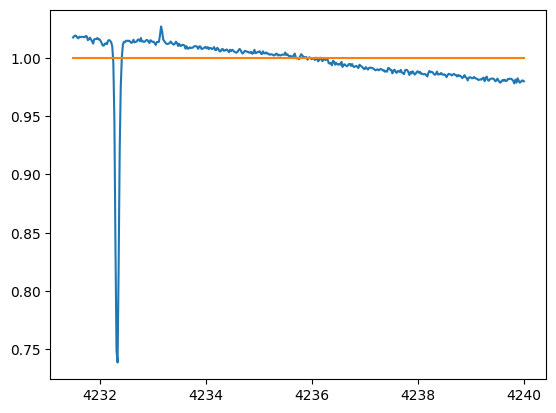

In [77]:
pythia = EdiblesOracle()
List = pythia.getFilteredObsList(object=["HD 149757"], MergedOnly=False, Wave=4232.0)
test = List.values.tolist()
print(test)
# for i in test:
#     print(i)
filename = test[6]


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Define the wavelength range and fetch the spectrum
wrange = [4231.5, 4240]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y = np.ones(len(wave))
plt.plot(wave, flux)
plt.plot(wave, y)

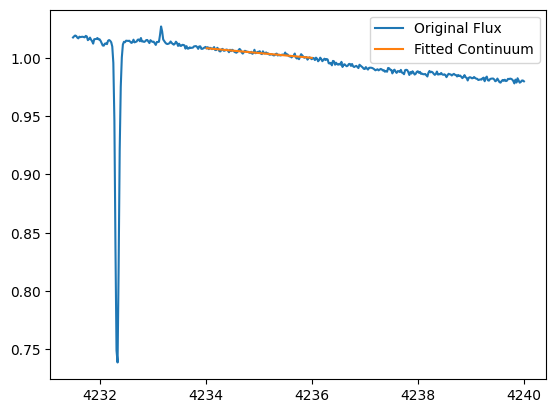

Standard deviation of flux: 0.0009678624003709839


In [78]:
continuum, std_dev = local_continuum(wave,flux, positions=[4235],windows=[2], spline_order=1,silent=False)
print("Standard deviation of flux:", std_dev)

chi- square 1072.452172840361
reduced chi-squared 11.171376800420427
Best-fit R value: 60.907926849666225
 1/R= 0.016418224223395644
Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
N0            4.947e+11        0      inf 1.773e+11     True     None     None
R                60.91        1      inf    21.83     True     None     None
b0               2.564        0      inf   0.0364     True     None     None
f0             0.00545     -inf      inf        0    False     None     None
f1              0.3319     -inf      inf    0.119    False   f0 * R     None
gamma0           1e+08     -inf      inf        0    False     None     None
gamma1           1e+08     -inf      inf        0    False     None     None
lambda0           4232     -inf      inf        0    False     None     None
lambda1           4233     -inf      inf        0    False     None     None
n_components         1     -inf      inf        0    False     None     None
n_step          

<IPython.core.display.Math object>

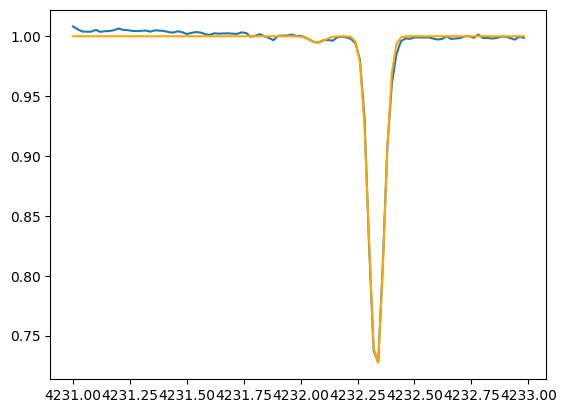

In [79]:
from IPython.display import display, Math
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Define the wavelength range and fetch the spectrum
wrange = [4231, 4233]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)

restwave = [4232.288, 4232.548]
# f = [0.4982, 0.2491, 0.4982/18, 0.2491/18]
gamma = [1e8,1e8]

# print(wave)




fitresult = fit_multi_voigt_absorptionlines(wavegrid=wave, ydata= flux,f_0= [0.005450], f_1 =[0.005450],direction="l",  restwave=restwave, gamma=gamma, 
                       b=1, N=4.7e13, v_rad=-15, v_resolution=3, n_step=25, std_dev= std_dev)
fitresult.params.pretty_print()
# print("chi-square value ",fitresult.chisqr)
# print("reduced chi-square value ",fitresult.redchi)
Li6_7_ratio =  r"\frac{CH+^{13}}{CH+^{12}}" + "=" + str(1/(fitresult.params['R'].value))
display(Math(Li6_7_ratio))


plt.plot(wave,flux)
# plt.xlim(6707.0,6708)
# plt.ylim(0.96,1.02)
plt.plot(wave, fitresult.best_fit, color='orange')
# plt.ylim(0.96,1.02)
plt.show()

100


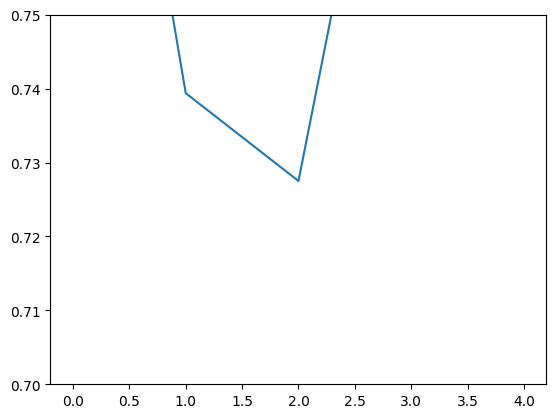

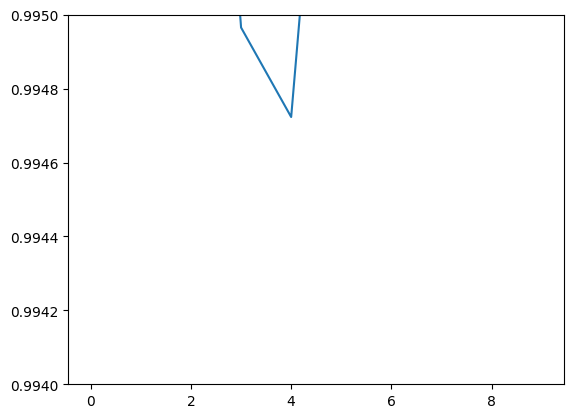

In [95]:
# a zoomed version
print(len(fitresult.best_fit))
plt.plot(fitresult.best_fit[65:70])
plt.ylim(0.7,0.75)
plt.show()
plt.plot(fitresult.best_fit[50:60])
plt.ylim(0.994,0.995)
plt.show()

# HD 110432 needs proper continuum fitting

C:\Users\user\Desktop\MITACS 2024 Docs\STUDY and WORK\DR4_all
***Common Objects***
['HD 110432']
**Filtered File List**
3908    /HD110432/BLUE_437/HD110432_w437_blue_20180619...
3919    /HD110432/BLUE_437/HD110432_w437_n7_20180619_B...
3922    /HD110432/BLUE_437/HD110432_w437_blue_20180619...
Name: Filename, dtype: object
3
['/HD110432/BLUE_437/HD110432_w437_blue_20180619_O15.fits', '/HD110432/BLUE_437/HD110432_w437_n7_20180619_B.fits', '/HD110432/BLUE_437/HD110432_w437_blue_20180619_O14.fits']


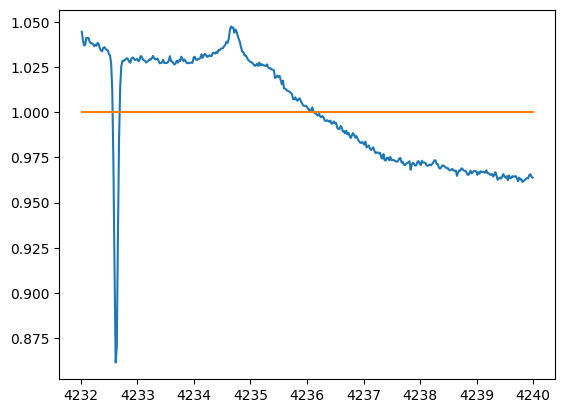

In [115]:
pythia = EdiblesOracle()
List = pythia.getFilteredObsList(object=["HD 110432"], MergedOnly=False, Wave=4232.0)
test = List.values.tolist()
print(test)
# for i in test:
#     print(i)
filename = test[0]


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Define the wavelength range and fetch the spectrum
wrange = [4232, 4240]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y = np.ones(len(wave))
plt.plot(wave, flux)
plt.plot(wave, y)

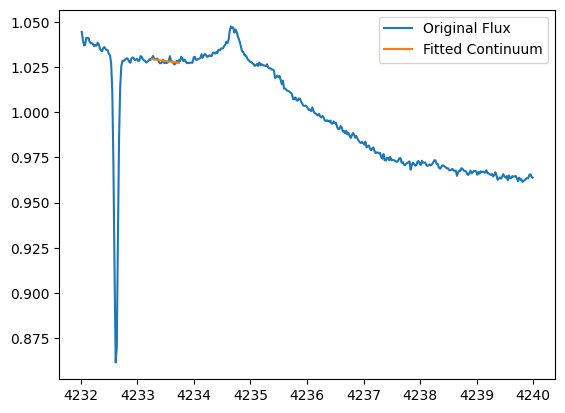

Standard deviation of flux: 0.0011077322481832805


In [112]:
continuum, std_dev = local_continuum(wave,flux, positions=[4233.5],windows=[0.5], spline_order=1,silent=False)
print("Standard deviation of flux:", std_dev)

chi- square 4942.480005561912
reduced chi-squared 88.25857152789128
Best-fit R value: 91.54990389549181
 1/R= 0.010923004366466003
Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
N0            3.376e+11        0      inf 6.086e+11     True     None     None
R                91.55        1      inf    165.5     True     None     None
b0              0.4963        0      inf  0.04335     True     None     None
f0             0.00545     -inf      inf        0    False     None     None
f1              0.4989     -inf      inf    0.902    False   f0 * R     None
gamma0           1e+08     -inf      inf        0    False     None     None
gamma1           1e+08     -inf      inf        0    False     None     None
lambda0           4232     -inf      inf        0    False     None     None
lambda1           4233     -inf      inf        0    False     None     None
n_components         1     -inf      inf        0    False     None     None
n_step            

<IPython.core.display.Math object>

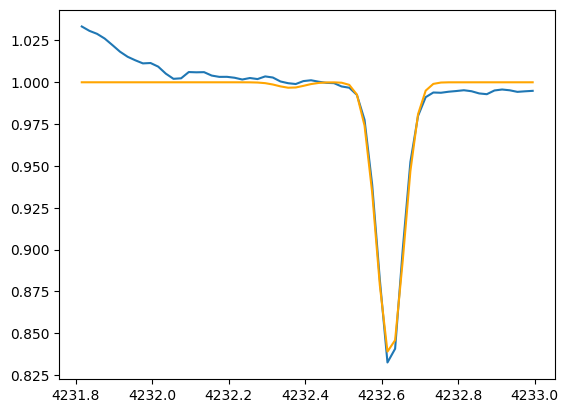

In [117]:
from IPython.display import display, Math
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Define the wavelength range and fetch the spectrum
wrange = [4231.8, 4233]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)

restwave = [4232.288, 4232.548]
# f = [0.4982, 0.2491, 0.4982/18, 0.2491/18]
gamma = [1e8,1e8]

# print(wave)




fitresult = fit_multi_voigt_absorptionlines(wavegrid=wave, ydata= flux,f_0= [0.005450], f_1 =[0.005450],direction="l",  restwave=restwave, gamma=gamma, 
                       b=1, N=4.7e13, v_rad=5, v_resolution=5.75, n_step=25, std_dev= std_dev)
fitresult.params.pretty_print()
# print("chi-square value ",fitresult.chisqr)
# print("reduced chi-square value ",fitresult.redchi)
Li6_7_ratio =  r"\frac{CH+^{13}}{CH+^{12}}" + "=" + str(1/(fitresult.params['R'].value))
display(Math(Li6_7_ratio))


plt.plot(wave,flux)
# plt.xlim(6707.0,6708)
# plt.ylim(0.96,1.02)
plt.plot(wave, fitresult.best_fit, color='orange')
# plt.ylim(0.96,1.02)
plt.show()

# HD 147889

C:\Users\user\Desktop\MITACS 2024 Docs\STUDY and WORK\DR4_all
***Common Objects***
['HD 147889']
**Filtered File List**
10479    /HD147889/BLUE_437/HD147889_w437_n1_20160728_B...
10484    /HD147889/BLUE_437/HD147889_w437_blue_20160807...
10491    /HD147889/BLUE_437/HD147889_w437_blue_20160728...
10502    /HD147889/BLUE_437/HD147889_w437_blue_20160728...
10522    /HD147889/BLUE_437/HD147889_w437_blue_20160807...
10526    /HD147889/BLUE_437/HD147889_w437_n5_20160807_B...
Name: Filename, dtype: object
6
['/HD147889/BLUE_437/HD147889_w437_n1_20160728_B.fits', '/HD147889/BLUE_437/HD147889_w437_blue_20160807_O14.fits', '/HD147889/BLUE_437/HD147889_w437_blue_20160728_O15.fits', '/HD147889/BLUE_437/HD147889_w437_blue_20160728_O14.fits', '/HD147889/BLUE_437/HD147889_w437_blue_20160807_O15.fits', '/HD147889/BLUE_437/HD147889_w437_n5_20160807_B.fits']


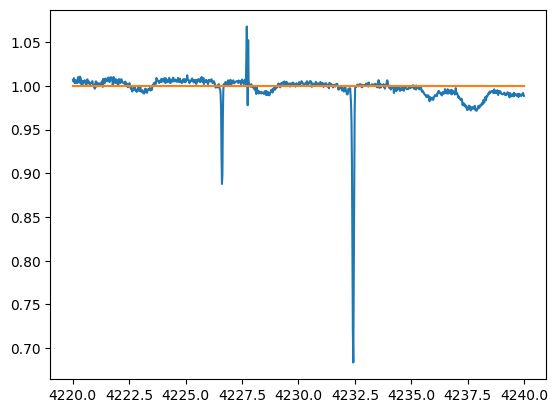

In [99]:
pythia = EdiblesOracle()
List = pythia.getFilteredObsList(object=["HD 147889"], MergedOnly=False, Wave=4232.0)
test = List.values.tolist()
print(test)
# for i in test:
#     print(i)
filename = test[4]


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Define the wavelength range and fetch the spectrum
wrange = [4220, 4240]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y = np.ones(len(wave))
plt.plot(wave, flux)
plt.plot(wave, y)

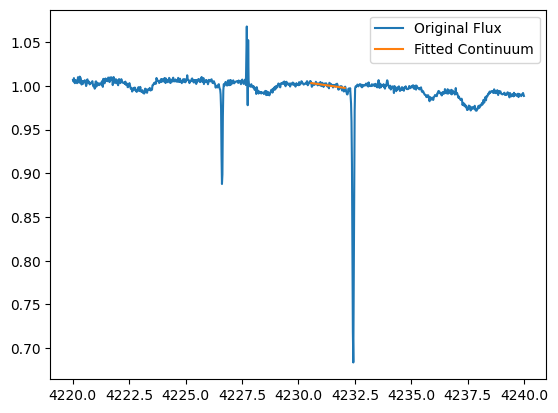

Standard deviation of flux: 0.0017845224570969885


In [100]:
continuum, std_dev = local_continuum(wave,flux, positions=[4231.3],windows=[1.5], spline_order=1,silent=False)
print("Standard deviation of flux:", std_dev)

chi- square 519.6810984185392
reduced chi-squared 5.413344775193117
Best-fit R value: 34.40890461958182
 1/R= 0.029062244528147763
Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
N0            9.837e+11        0      inf 2.276e+11     True     None     None
R                34.41        1      inf    7.967     True     None     None
b0               2.524        0      inf  0.04193     True     None     None
f0             0.00545     -inf      inf        0    False     None     None
f1              0.1875     -inf      inf  0.04342    False   f0 * R     None
gamma0           1e+08     -inf      inf        0    False     None     None
gamma1           1e+08     -inf      inf        0    False     None     None
lambda0           4232     -inf      inf        0    False     None     None
lambda1           4233     -inf      inf        0    False     None     None
n_components         1     -inf      inf        0    False     None     None
n_step            

<IPython.core.display.Math object>

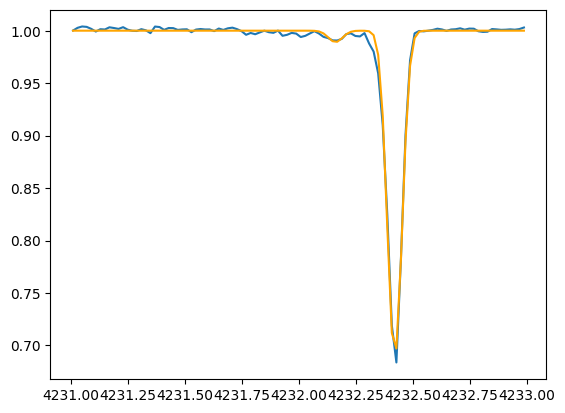

In [108]:
from IPython.display import display, Math
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Define the wavelength range and fetch the spectrum
wrange = [4231, 4233]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)

restwave = [4232.288, 4232.548]
# f = [0.4982, 0.2491, 0.4982/18, 0.2491/18]
gamma = [1e8,1e8]

# print(wave)




fitresult = fit_multi_voigt_absorptionlines(wavegrid=wave, ydata= flux,f_0= [0.005450], f_1 =[0.005450],direction="l",  restwave=restwave, gamma=gamma, 
                       b=1, N=4.7e13, v_rad=-15, v_resolution=3, n_step=25, std_dev= std_dev)
fitresult.params.pretty_print()
# print("chi-square value ",fitresult.chisqr)
# print("reduced chi-square value ",fitresult.redchi)
Li6_7_ratio =  r"\frac{CH+^{13}}{CH+^{12}}" + "=" + str(1/(fitresult.params['R'].value))
display(Math(Li6_7_ratio))


plt.plot(wave,flux)
# plt.xlim(6707.0,6708)
# plt.ylim(0.96,1.02)
plt.plot(wave, fitresult.best_fit, color='orange')
# plt.ylim(0.96,1.02)
plt.show()

# HD 149038

C:\Users\user\Desktop\MITACS 2024 Docs\STUDY and WORK\DR4_all
***Common Objects***
['HD 149038']
**Filtered File List**
25200    /HD149038/BLUE_437/HD149038_w437_n30_20150702_...
25205    /HD149038/BLUE_437/HD149038_w437_blue_20160222...
25206    /HD149038/BLUE_437/HD149038_w437_blue_20160222...
25215    /HD149038/BLUE_437/HD149038_w437_blue_20150702...
25233    /HD149038/BLUE_437/HD149038_w437_blue_20150702...
25242    /HD149038/BLUE_437/HD149038_w437_n17_20160222_...
Name: Filename, dtype: object
6
['/HD149038/BLUE_437/HD149038_w437_n30_20150702_B.fits', '/HD149038/BLUE_437/HD149038_w437_blue_20160222_O14.fits', '/HD149038/BLUE_437/HD149038_w437_blue_20160222_O15.fits', '/HD149038/BLUE_437/HD149038_w437_blue_20150702_O15.fits', '/HD149038/BLUE_437/HD149038_w437_blue_20150702_O14.fits', '/HD149038/BLUE_437/HD149038_w437_n17_20160222_B.fits']


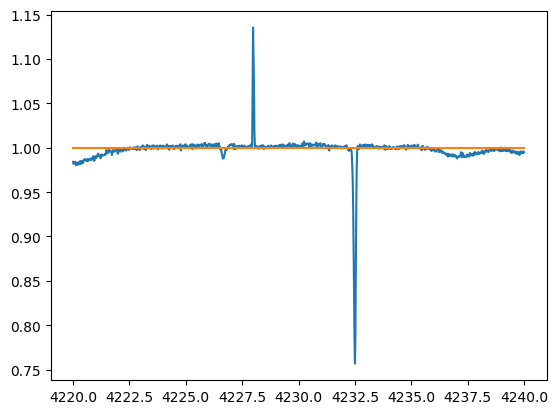

In [109]:
pythia = EdiblesOracle()
List = pythia.getFilteredObsList(object=["HD 149038"], MergedOnly=False, Wave=4232.0)
test = List.values.tolist()
print(test)
# for i in test:
#     print(i)
filename = test[3]


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Define the wavelength range and fetch the spectrum
wrange = [4220, 4240]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y = np.ones(len(wave))
plt.plot(wave, flux)
plt.plot(wave, y)

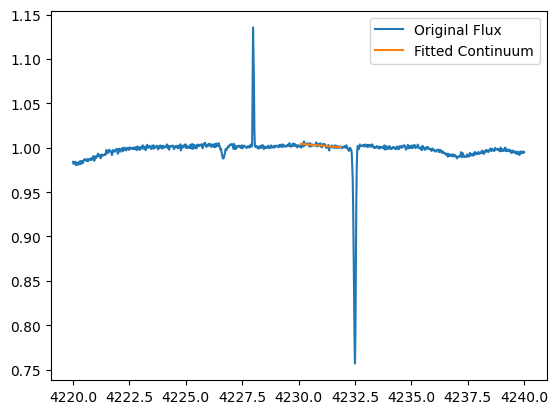

Standard deviation of flux: 0.0014433643910902933


In [71]:
continuum, std_dev = local_continuum(wave,flux, positions=[4231],windows=[1.8], spline_order=1,silent=False)
print("Standard deviation of flux:", std_dev)

chi- square 484.32768069063536
reduced chi-squared 5.045080007194119
Best-fit R value: 63.48577831730104
 1/R= 0.015751559270519043
Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
N0            5.191e+11        0      inf 2.538e+11     True     None     None
R                63.49        1      inf    31.04     True     None     None
b0               3.787        0      inf  0.05623     True     None     None
f0             0.00545     -inf      inf        0    False     None     None
f1               0.346     -inf      inf   0.1692    False   f0 * R     None
gamma0           1e+08     -inf      inf        0    False     None     None
gamma1           1e+08     -inf      inf        0    False     None     None
lambda0           4232     -inf      inf        0    False     None     None
lambda1           4233     -inf      inf        0    False     None     None
n_components         1     -inf      inf        0    False     None     None
n_step           

<IPython.core.display.Math object>

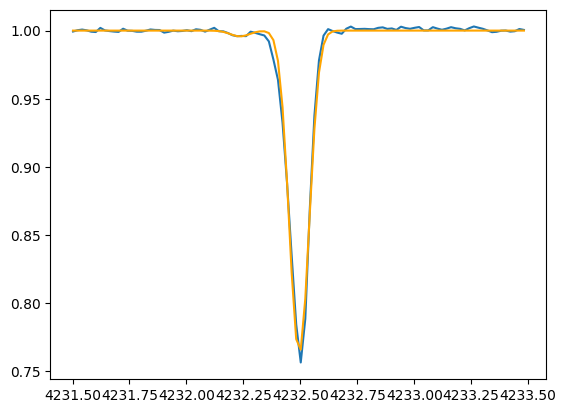

In [110]:
from IPython.display import display, Math
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Define the wavelength range and fetch the spectrum
wrange = [4231.5, 4233.5]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)

restwave = [4232.288, 4232.548]
# f = [0.4982, 0.2491, 0.4982/18, 0.2491/18]
gamma = [1e8,1e8]

# print(wave)




fitresult = fit_multi_voigt_absorptionlines(wavegrid=wave, ydata= flux,f_0= [0.005450], f_1 =[0.005450],direction="l",  restwave=restwave, gamma=gamma, 
                       b=1, N=4.7e13, v_rad=-15, v_resolution=3, n_step=25, std_dev= std_dev)
fitresult.params.pretty_print()
# print("chi-square value ",fitresult.chisqr)
# print("reduced chi-square value ",fitresult.redchi)
Li6_7_ratio =  r"\frac{CH+^{13}}{CH+^{12}}" + "=" + str(1/(fitresult.params['R'].value))
display(Math(Li6_7_ratio))


plt.plot(wave,flux)
# plt.xlim(6707.0,6708)
# plt.ylim(0.96,1.02)
plt.plot(wave, fitresult.best_fit, color='orange')
# plt.ylim(0.96,1.02)
plt.show()

100


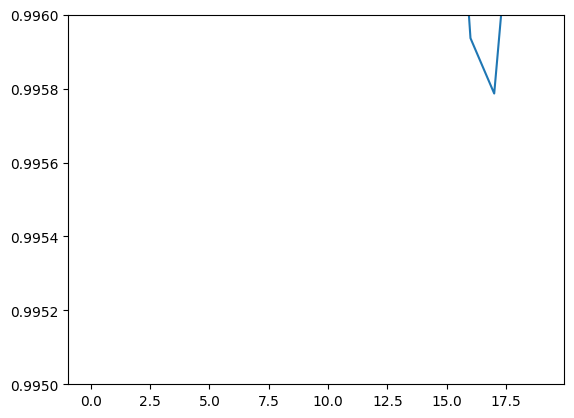

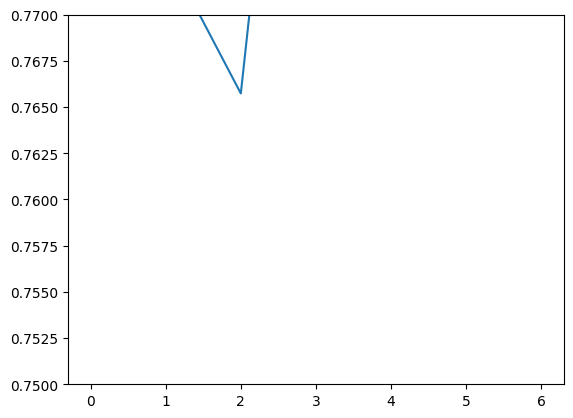

In [73]:
# a zoomed version
print(len(fitresult.best_fit))
plt.plot(fitresult.best_fit[20:40])
plt.ylim(0.995,0.996)
plt.show()
plt.plot(fitresult.best_fit[48:55])
plt.ylim(0.75,0.77)
plt.show()

# HD 179406

C:\Users\user\Desktop\MITACS 2024 Docs\STUDY and WORK\DR4_all
***Common Objects***
['HD 179406']
**Filtered File List**
1533    /HD179406/BLUE_437/HD179406_w437_blue_20180715...
1541    /HD179406/BLUE_437/HD179406_w437_n8_20180715_B...
1544    /HD179406/BLUE_437/HD179406_w437_blue_20180715...
Name: Filename, dtype: object
3
['/HD179406/BLUE_437/HD179406_w437_blue_20180715_O15.fits', '/HD179406/BLUE_437/HD179406_w437_n8_20180715_B.fits', '/HD179406/BLUE_437/HD179406_w437_blue_20180715_O14.fits']


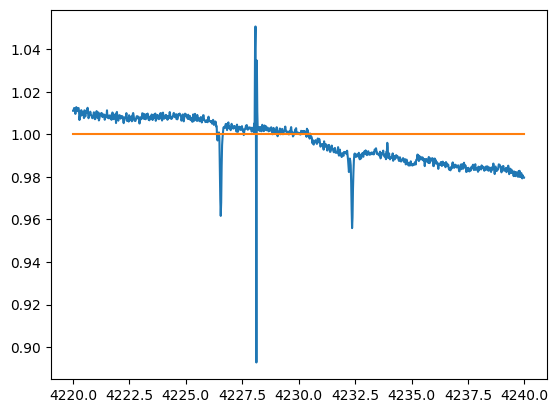

In [74]:
pythia = EdiblesOracle()
List = pythia.getFilteredObsList(object=["HD 179406"], MergedOnly=False, Wave=4232.0)
test = List.values.tolist()
print(test)
# for i in test:
#     print(i)
filename = test[0]


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Define the wavelength range and fetch the spectrum
wrange = [4220, 4240]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
y = np.ones(len(wave))
plt.plot(wave, flux)
plt.plot(wave, y)

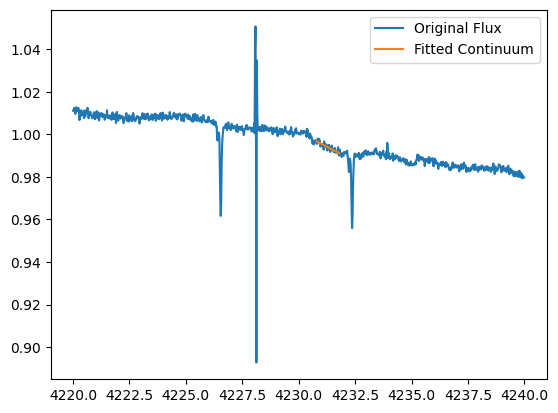

Standard deviation of flux: 0.0010264082495873678


In [75]:
continuum, std_dev = local_continuum(wave,flux, positions=[4231.3],windows=[1], spline_order=1,silent=False)
print("Standard deviation of flux:", std_dev)

chi- square 274.8719754842041
reduced chi-squared 2.863249744627126
Best-fit R value: 24.56074572186854
 1/R= 0.04071537612596242
Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
N0            1.506e+11        0      inf 1.006e+11     True     None     None
R                24.56        1      inf    16.43     True     None     None
b0              0.4395        0      inf  0.02002     True     None     None
f0             0.00545     -inf      inf        0    False     None     None
f1              0.1339     -inf      inf  0.08957    False   f0 * R     None
gamma0           1e+08     -inf      inf        0    False     None     None
gamma1           1e+08     -inf      inf        0    False     None     None
lambda0           4232     -inf      inf        0    False     None     None
lambda1           4233     -inf      inf        0    False     None     None
n_components         1     -inf      inf        0    False     None     None
n_step             

<IPython.core.display.Math object>

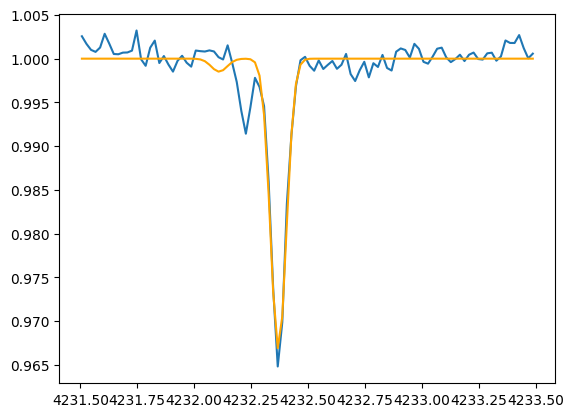

In [76]:
from IPython.display import display, Math
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Define the wavelength range and fetch the spectrum
wrange = [4231.5, 4233.5]
sp = EdiblesSpectrum(filename)
sp.getSpectrum(xmin=wrange[0], xmax=wrange[1])
wave = sp.bary_wave
flux = sp.bary_flux

# Filter the spectrum within the specified wavelength range
idx = np.where((wave > wrange[0]) & (wave < wrange[1]))
wave = wave[idx]
flux = flux[idx]

# Normalize the flux
flux = flux / np.median(flux)

restwave = [4232.288, 4232.548]
# f = [0.4982, 0.2491, 0.4982/18, 0.2491/18]
gamma = [1e8,1e8]

# print(wave)




fitresult = fit_multi_voigt_absorptionlines(wavegrid=wave, ydata= flux,f_0= [0.005450], f_1 =[0.005450],direction="l",  restwave=restwave, gamma=gamma, 
                       b=1, N=4.7e12, v_rad=-15, v_resolution=5.75, n_step=25, std_dev= std_dev)
fitresult.params.pretty_print()
# print("chi-square value ",fitresult.chisqr)
# print("reduced chi-square value ",fitresult.redchi)
Li6_7_ratio =  r"\frac{CH+^{13}}{CH+^{12}}" + "=" + str(1/(fitresult.params['R'].value))
display(Math(Li6_7_ratio))


plt.plot(wave,flux)
# plt.xlim(6707.0,6708)
# plt.ylim(0.96,1.02)
plt.plot(wave, fitresult.best_fit, color='orange')
# plt.ylim(0.96,1.02)
plt.show()